# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

<AxesSubplot:>

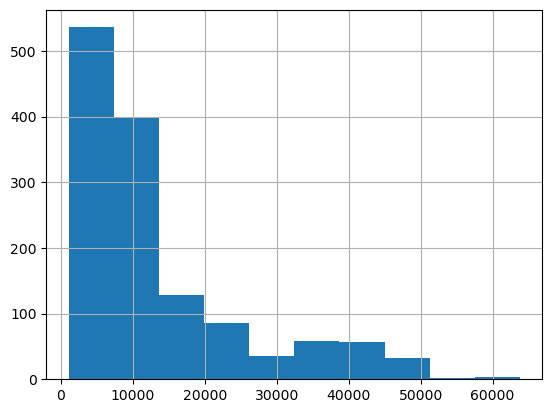

In [4]:
medical.charges.hist()

In [5]:
medical.describe()
#The distribution seems appropriate
#The distribution follows the standard hiearchy of medical procedures vs cost;
# - As in, the most common medical procedures occupy the lowest costs, and the gradient of demand decreases as medical procedure price increases

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: 

The administrator should not be too concerned. 

Calculation:
We should use the bootstrapping method to approximate the sampling distribution of this sample, and how 12k falls within the mean and std of this distribution. 

Using the norm.cdf function shows that there is a miniscule, less than 5 percent chance that medical charges fall below 12k (Calculation and method is shown below).

In [6]:
#Creating function to sample medical charges column
def medical_sampler(n):
    return np.random.choice(medical.charges, n)

In [7]:
#Creating list comprehension to sample from medical.charges 10000x with sample size 1338

In [42]:
seed(1338)
sample1338 = [np.mean(medical_sampler(1338)) for i in range(10000)]

In [43]:
np.mean(sample1338), np.std(sample1338)

(13270.222352119035, 331.75153558484504)

In [52]:
sample1338mean = 13270.222352119035
sample1338std = 331.75153558484504

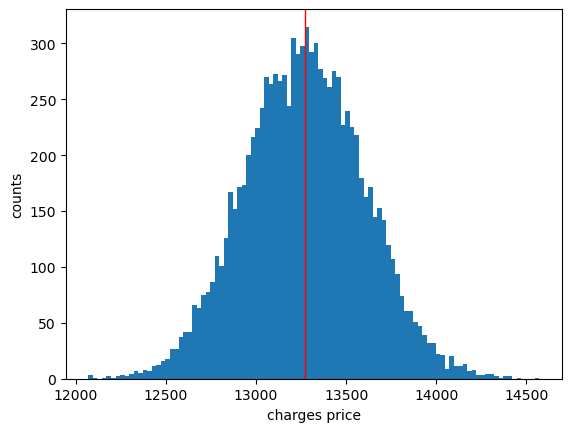

In [44]:

#Plotting histogram of sample
_ = plt.hist(sample1338, bins=100)
_ = plt.ylabel('counts')
_ = plt.xlabel('charges price')
_ = plt.axvline(x=np.mean(sample1338), linewidth=1, color='r')

In [50]:

from scipy.stats import norm

In [54]:
norm.cdf(12000, loc=sample1338mean, scale=sample1338std)

6.437528005149795e-05

In [58]:

norm.ppf(.05, loc=sample1338mean, scale=sample1338std)

12724.539635565583

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

The appropriate confidence interval is 95%
One sided interval test (left side test)


In [61]:
#Calculating 95% confidence interval
np.percentile(sample1338, 5)

12728.36111196973

In [62]:
##### Calculate critical value

norm.ppf(.05, np.mean(sample1338), np.std(sample1338))

12724.539635565583

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

The null hypothesis: The insurance group mean and the none-insurance group mean are equal


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [16]:
insurancegp = medical.query('insuranceclaim == 1')

<AxesSubplot:>

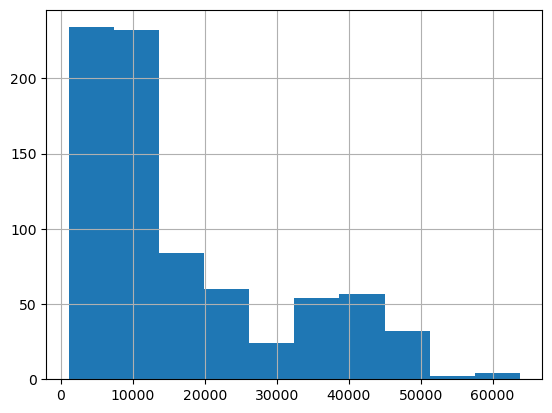

In [17]:
insurancegp.charges.hist()

In [66]:
insurancegpmean = np.mean(insurancegp.charges)
insurancegpmean

16423.928276537663

In [67]:
insurancegpstd = np.std(insurancegp.charges)
insurancegpstd

14036.956250260411

In [123]:
insurancegpvar = np.var(insurancegp.charges)
insurancegpvar

197036140.77172482

In [23]:
insurancegp.charges.describe()

count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64

<AxesSubplot:>

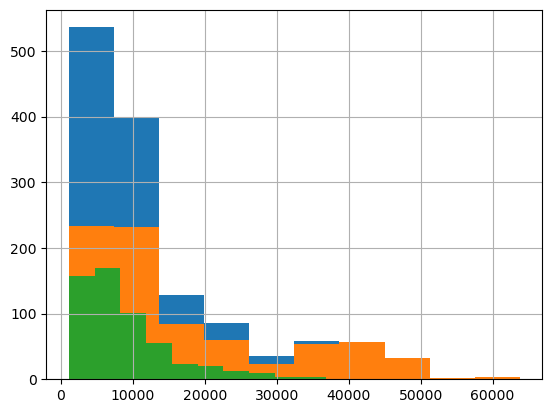

In [71]:
medical.charges.hist()
insurancegp.charges.hist()
nonegp.charges.hist()

In [24]:
nonegp = medical.query('insuranceclaim == 0')

<AxesSubplot:>

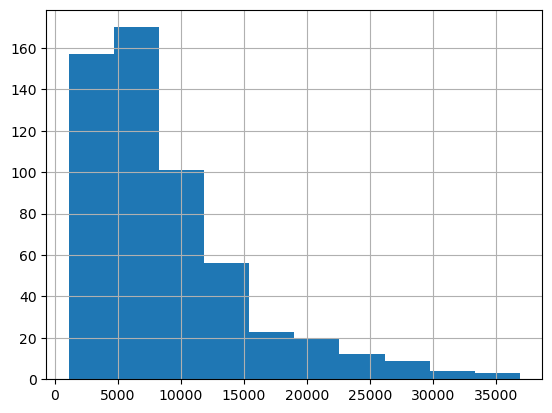

In [25]:
nonegp.charges.hist()

In [26]:
nonegp.charges.describe()

count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64

In [72]:
nonegpmean = np.mean(nonegp.charges)
nonegpmean

8821.421892306294

In [74]:
nonegpstd = np.std(nonegp.charges)
nonegpstd

6440.699841605233

In [124]:
nonegpvar = np.var(nonegp.charges)
nonegpvar

41482614.44965368

In [ ]:
#Null Hypothesis testing: simulate random sampling as if both datasets are derived from same population -i.e. assume both datasets = equal characteristics

In [92]:
def nullsampler(n):
    nullsample = np.random.choice(medical.charges, n)
    insurancegp1 = nullsample[:783]
    noneinsurancegp1 = nullsample[783:]
    return np.mean(insurancegp1) - np.mean(noneinsurancegp1)

In [95]:
null_sample = [nullsampler(1338) for i in range(10000)]

In [103]:
null_sample_mean = np.mean(null_sample)
null_sample_mean

-8.315151955335967

In [104]:
null_sample_std = np.std(null_sample)
null_sample_std

677.9041766893229

In [114]:
#Calculating diff of mean of original empirical result
empiricaldiff = insurancegpmean - nonegpmean
empiricaldiff

7602.506384231368

In [115]:
#Compare empirical/observation mean diff vs. simulated mean difference 
norm.cdf(empiricaldiff, loc=null_sample_mean, scale=null_sample_std)


1.0

In [ ]:
# less than 1 percent chance of obtaining our empirical results

In [116]:
norm.ppf(0.99, loc=null_sample_mean, scale=null_sample_std)

1568.7257882892768

In [119]:
norm.sf(empiricaldiff, loc=null_sample_mean, scale=null_sample_std)

1.5027630115348497e-29

In [ ]:
#Calculating t stat using hand-written formula 

In [125]:
n0 = 783
n1 = 555
insurancegpstd
nonegpstd

pooledstd = np.sqrt( ((n0-1)*insurancegpstd**2 + (n1-1)*nonegpstd**2) / (n0 + n1 - 2) )
pooledstd

11512.282899205744

In [127]:
# I am just checking that this pooledstd is between the std values of my original stds
insurancegpstd, nonegpstd

(14036.956250260411, 6440.699841605233)

In [129]:
#Calculating tstat
insurancegpmean
nonegpmean
pooledstd

tstat = (insurancegpmean - nonegpmean) / (pooledstd*(np.sqrt(1/n0 + 1/n1)))
tstat

11.901306943555385

In [ ]:
# The p-value corresponding to this t-statistic is way below 1%
# Thus, the difference of means between insurance vs non-insurance group charges is statistically significant
# As in, we can reject the null hypothesis and accept the alternate hypothesis

In [130]:
###This is just a note to myself, I am decomposing above formula to double check the values within each part of the calculation
insurancegpmean - nonegpmean 

7602.506384231368

In [132]:
###This is just a note to myself, I am decomposing above formula to double check the values within each part of the calculation
np.sqrt(1/n0 + 1/n1)

0.05548820604394679

In [133]:
# Double checking above calculation by calculating T stat and p-value via scipy.stats
from scipy import stats

stats.ttest_ind(insurancegp.charges, nonegp.charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [ ]:
#Both the hand-written calculation for the t-stat of two samples and the scipy.stats computed t-stat compute a t-stat of ~11.9
#This t-stat is associated with a pvalue of 4.46e-31
#This p-value is significantly less than the alpha of 5%

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

First Response
I actually forgot to ask this question during our meeting:

Why did we use a T test (for two samples) when the sample size is above 30 (sample size in this case was 1338)? Especially the case given our degrees of freedom for a size-1338 sample would be 1337, which is considerably large. When sample size and degrees of freedome are above 30, they should approximate a Z distribution and not a T distribution (?)

Shouldn't we have used a Z-test instead?

But in response to Q6 above: I could not find z-test for two samples. But given the hand-written formula for this test statisic is given above, we can construct the Z-test for two samples by hand and re-do the computation for this test statistic of two means for a z-distribution (but given our calculation for t-stat above was for 1337 degrees of freedom, and 1338 sample size, the answer should still be the same)


###

Corrected Response

There is no provided z test, because t and z test/distributions converge at high sample sizes (which is what I accidentally hinted at in my first response). 



## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test